<a href="https://colab.research.google.com/github/Siddhu290/Machine_Learning/blob/main/2024-07-18/Weather_forcast_desion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
import numpy as np


In [102]:
df= pd.read_csv('https://raw.githubusercontent.com/words-sdsc/coursera/master/big-data-4/daily_weather.csv')

In [103]:
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [104]:
df.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [105]:
df.fillna(df.mean(),inplace=True)

In [106]:
df.isnull().sum()

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [107]:
df.corr()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
number,1.000000,-0.029746,0.044997,-0.007632,-0.021926,0.004228,-0.013762,0.007735,-0.002071,-0.025631,-0.018406
air_pressure_9am,-0.029746,1.000000,-0.049033,-0.315525,0.233629,-0.292587,0.251762,-0.087398,-0.103864,-0.430212,-0.477520
air_temp_9am,0.044997,-0.049033,1.000000,-0.024671,-0.285496,-0.088475,-0.282381,-0.214295,-0.265859,-0.586959,-0.497288
avg_wind_direction_9am,-0.007632,-0.315525,-0.024671,1.000000,-0.431175,0.868667,-0.454946,0.125462,0.122319,0.355215,0.392974
avg_wind_speed_9am,-0.021926,0.233629,-0.285496,-0.431175,1.000000,-0.355057,0.990382,0.017539,0.017938,-0.090460,-0.145529
max_wind_direction_9am,0.004228,-0.292587,-0.088475,0.868667,-0.355057,1.000000,-0.378597,0.104477,0.088313,0.376330,0.414149
max_wind_speed_9am,-0.013762,0.251762,-0.282381,-0.454946,0.990382,-0.378597,1.000000,0.019731,0.027353,-0.103608,-0.165806
rain_accumulation_9am,0.007735,-0.087398,-0.214295,0.125462,0.017539,0.104477,0.019731,1.000000,0.733782,0.244927,0.198764
rain_duration_9am,-0.002071,-0.103864,-0.265859,0.122319,0.017938,0.088313,0.027353,0.733782,1.000000,0.315870,0.281561
relative_humidity_9am,-0.025631,-0.430212,-0.586959,0.355215,-0.090460,0.376330,-0.103608,0.244927,0.315870,1.000000,0.883074


In [108]:
df['high_humidity_label'] =(df['relative_humidity_3pm']>24.99)*1

In [109]:
df['high_humidity_label']

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1095, dtype: int64

In [110]:
df

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,1
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,1
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,1
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,1


In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scalar= StandardScaler()

In [113]:
scalar=scalar.fit_transform(df)

In [114]:
scalar

array([[-1.73046975, -0.25879903,  0.88731521, ...,  0.32122776,
         0.03621215,  1.00091366],
       [-1.72730618, -0.48291346,  0.58061247, ..., -0.38933763,
        -0.70703906, -0.99908717],
       [-1.72414262,  1.30805661, -0.38537978, ..., -0.99532486,
        -0.92764147, -0.99908717],
       ...,
       [ 1.72414262, -0.71815831,  0.55299051, ...,  0.44573468,
         0.75355021,  1.00091366],
       [ 1.72730618, -1.97667689, -0.58565158, ...,  1.2018098 ,
         1.018721  ,  1.00091366],
       [ 1.73046975,  0.83296584,  1.14573044, ..., -0.77301914,
        -0.89921445, -0.99908717]])

In [115]:
x =df.iloc[:,0:10]

In [116]:
y=df["high_humidity_label"]

In [117]:
x.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [121]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [122]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

predict on set

In [123]:
prediction=humidity_classifier.predict(X_test)

In [124]:
prediction[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [134]:
y_test

292    0
143    1
497    0
325    1
221    0
      ..
296    1
574    0
979    0
374    0
659    0
Name: high_humidity_label, Length: 362, dtype: int64

measure accuracy

In [127]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.8839779005524862

In [128]:
confusion_matrix(y_true=y_test, y_pred=prediction)

array([[179,  20],
       [ 22, 141]])

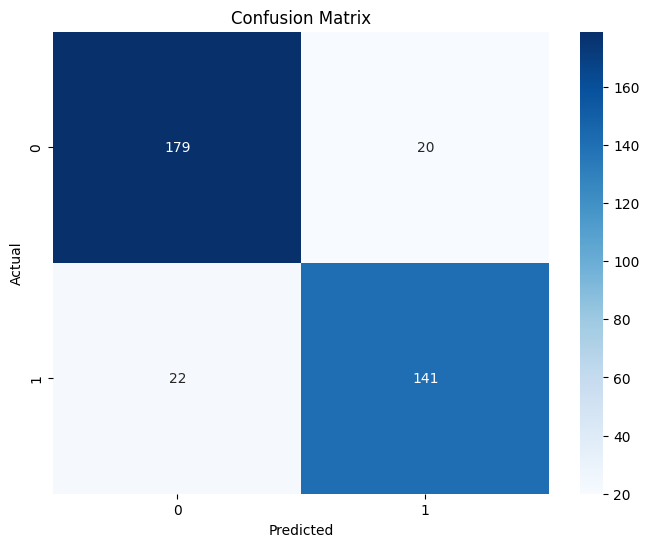

In [129]:

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [130]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9285714285714286, 'x[9] <= 20.08\ngini = 0.499\nsamples = 733\nvalue = [349, 384]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[1] <= 918.353\ngini = 0.173\nsamples = 303\nvalue = [274, 29]'),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.42\nsamples = 70\nvalue = [49, 21]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.066\nsamples = 233\nvalue = [225, 8]'),
 Text(0.5833333333333334, 0.7857142857142857, 'x[9] <= 32.005\ngini = 0.288\nsamples = 430\nvalue = [75, 355]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[5] <= 154.3\ngini = 0.487\nsamples = 150\nvalue = [63, 87]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 920.225\ngini = 0.469\nsamples = 72\nvalue = [45, 27]'),
 Text(0.25, 0.35714285714285715, 'x[3] <= 100.168\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[4] <= 4.396\ngini = 0.375\nsamples = 24\nvalue = [6, 18]'),
 Text(0.08333333333333333, 0.07142857142857142, 'gini = 0.111\nsamples = 17\nva

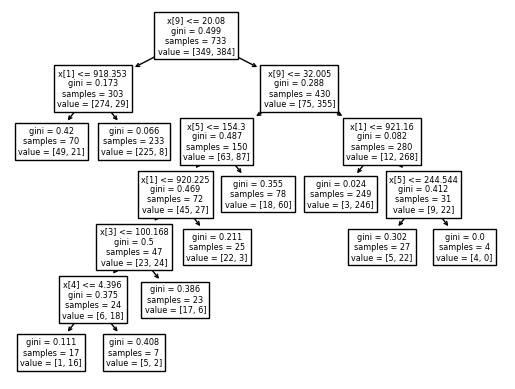

In [131]:
plot_tree(humidity_classifier)